# Importe librerias 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import recall_score
from seaborn import heatmap
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

# Funciones 

## Entrenamiento

In [14]:
def entrenamiento_and_report_simple(data_entrenamiento,objetivo,cv,modelo):
    predict_list = cross_val_predict(modelo,data_entrenamiento,objetivo, cv=cv)
    confution = confusion_matrix( y.tolist(),  predict_list.tolist())
    matriz_confusion = confusion_matrix(predict_list, objetivo)
    heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.figure()
    print(f"Classification report:\n{classification_report(predict_list, objetivo)}")

In [15]:
def entrenamiento_and_report_red_neuronal(data_entrenamiento,objetivo,cv,modelo):
    predict_list = cross_val_predict(modelo,data_entrenamiento,objetivo, cv=cv)
    confution = confusion_matrix( y.tolist(),  predict_list.tolist())
    matriz_confusion = confusion_matrix(predict_list, objetivo)
    heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
    plt.title("Confusion matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.figure()
    print(f"Classification report:\n{classification_report(predict_list, objetivo)}")

## Optimizacion de parametros

In [16]:
def Optimizacion_parametros(param_grid,Modelo,data_entrenamiento,objetivo,cv):
    grid_search = GridSearchCV(Modelo, param_grid, cv=cv,
                           scoring='precision', 
                           return_train_score=True)
    grid_search.fit(data_entrenamiento, objetivo)
    a = pd.DataFrame(grid_search.cv_results_['params'])
    a = pd.DataFrame(grid_search.cv_results_['params'])
    a['mean_train_score'] = grid_search.cv_results_['mean_train_score']
    a['mean_test_score'] = grid_search.cv_results_['mean_test_score']
    a['std_train_score'] = grid_search.cv_results_['std_train_score']
    a['std_test_score'] = grid_search.cv_results_['std_test_score']
    print('Mejor resultado' +''+ str(grid_search.best_score_)  )     
    print('Mejor parametro' +''+ str(grid_search.best_estimator_)) 
    minv = grid_search.best_score_
    return a, a[(a.mean_test_score == minv)],grid_search.best_estimator_,grid_search.best_score_



# Funcion PCA

In [17]:
def PCA_conversion(datos,Numero_parametros, nombre_variable):
    scaler=StandardScaler()#normalizamos los datos
    scaler.fit(datos) # calculo la media para poder hacer la transformacion
    X_scaled=scaler.transform(datos)# Ahora si, escalo los datos y los normalizo
    pca=PCA(n_components=Numero_parametros) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
    pca.fit(X_scaled) # obtener los componentes principales
    ear2_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PC
    
    print("shape of X_pca", ear2_pca.shape)
    expl = pca.explained_variance_ratio_
    print(expl)
    print('suma:',sum(expl[0:5]))
    print("shape of X_pca", ear2_pca.shape)
    expl = pca.explained_variance_ratio_
    print(expl)
    
    print('suma:',sum(expl[0:1000]))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    
    x = range(1, Numero_parametros + 1)
    new_columns = []
    for n in x:
        name = 'nombre_variable' +  str(n)
        new_columns.append(name)

    bm = pd.DataFrame(data = ear2_pca, columns = new_columns)
    bm.index = np.arange(1,len(bm)+1)
    return bm

## Carga de datos

In [18]:
path_dataset = 'archive/vein.csv'
ear = pd.read_csv(path_dataset)
ear = ear.iloc[1:]
y = ear['has_DM2']
path_dataset = 'archive/veinData.csv'
ear2 = pd.read_csv(path_dataset)
ear2= (ear2.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'Q1.{i+1}' for i in range(ear2.shape[1])], axis=1))
ear2= ear2.apply(pd.to_numeric, errors='coerce')

In [19]:
ear2

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.992,Q1.993,Q1.994,Q1.995,Q1.996,Q1.997,Q1.998,Q1.999,Q1.1000,Q1.1001
0,-0.615666,-0.599027,-0.593350,-0.597768,-0.596158,-0.580065,-0.564412,-0.571615,-0.577626,-0.591627,...,-0.549209,-0.543782,-0.537478,-0.615201,-0.695328,-0.772340,-0.729576,-0.620902,-0.558183,-0.517232
1,0.062839,0.081927,0.103143,0.126321,0.129155,0.083704,0.041234,0.050539,0.059600,0.051188,...,0.032619,-0.016801,-0.047305,0.028624,0.081032,0.063861,0.042679,0.019258,0.001064,-0.003515
2,-0.721248,-0.737716,-0.745235,-0.745085,-0.748967,-0.762356,-0.775159,-0.793872,-0.810790,-0.802970,...,-0.624722,-0.686351,-0.788667,-0.748211,-0.715600,-0.721949,-0.686472,-0.630941,-0.786047,-0.850955
3,0.537584,0.527991,0.509941,0.484546,0.475273,0.503972,0.528374,0.502134,0.475366,0.476686,...,0.460929,0.464109,0.440232,0.494675,0.545867,0.579928,0.590313,0.585650,0.582781,0.562296
4,0.236569,0.223722,0.217669,0.217805,0.217767,0.217265,0.216373,0.215545,0.214325,0.226446,...,0.132533,0.127580,0.162759,0.152212,0.167956,0.253981,0.237532,0.167464,0.180390,0.197671
5,-0.890746,-0.953848,-1.002854,-1.039709,-1.039166,-0.949554,-0.869180,-0.950525,-1.028780,-1.006628,...,-1.160705,-1.161235,-1.028485,-1.087139,-1.091313,-0.936965,-1.005237,-1.182036,-1.113989,-1.077731
6,0.639751,0.614042,0.619564,0.653360,0.665590,0.626739,0.589987,0.604209,0.617065,0.625002,...,0.177048,0.200682,0.213956,0.254000,0.275128,0.248291,0.272549,0.320843,0.284044,0.249392
7,-0.361985,-0.345746,-0.347623,-0.365895,-0.380164,-0.385177,-0.388048,-0.371213,-0.353947,-0.348471,...,-0.323822,-0.308553,-0.314261,-0.284547,-0.272452,-0.307062,-0.315364,-0.306472,-0.222982,-0.191505
8,-0.265625,-0.252501,-0.245340,-0.243634,-0.244396,-0.250984,-0.255071,-0.231521,-0.207911,-0.220973,...,-0.056964,-0.066056,-0.154280,-0.175156,-0.198943,-0.241190,-0.206828,-0.132491,-0.131833,-0.157137
9,-0.867051,-0.863433,-0.862208,-0.863528,-0.857110,-0.831974,-0.808501,-0.831313,-0.852193,-0.851836,...,-0.809563,-0.823690,-0.818222,-0.799815,-0.780365,-0.759496,-0.730049,-0.694410,-0.720796,-0.748851


# Optimizacion de modelo

## XGBClassifier

In [20]:
from xgboost import XGBClassifier

In [21]:
param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [22]:
XGBClassifier = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [23]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,XGBClassifier,ear2,y,5)

[21:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [24]:
best_score

0.9333333333333332

In [25]:
best_stimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [26]:
total_parametros

,max_depth,min_child_weight,mean_train_score,mean_test_score,std_train_score,std_test_score
0,3,1,1.00,0.933333,0.000,0.133333
1,3,3,0.45,0.400000,0.225,0.200000
2,3,5,0.00,0.000000,0.000,0.000000
3,5,1,1.00,0.933333,0.000,0.133333
4,5,3,0.45,0.400000,0.225,0.200000
5,5,5,0.00,0.000000,0.000,0.000000
6,7,1,1.00,0.933333,0.000,0.133333
7,7,3,0.45,0.400000,0.225,0.200000
8,7,5,0.00,0.000000,0.000,0.000000
9,9,1,1.00,0.933333,0.000,0.133333


In [27]:
mejores_parametros

,max_depth,min_child_weight,mean_train_score,mean_test_score,std_train_score,std_test_score
0,3,1,1.0,0.933333,0.0,0.133333
3,5,1,1.0,0.933333,0.0,0.133333
6,7,1,1.0,0.933333,0.0,0.133333
9,9,1,1.0,0.933333,0.0,0.133333


## Adabost

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [29]:
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

In [30]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [31]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,ada_clf,ear2,y,5)

Mejor resultado1.0
Mejor parametroAdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.1, n_estimators=10)


In [32]:
best_score

1.0

In [33]:
best_stimator

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.1, n_estimators=10)

In [34]:
total_parametros

,base_estimator__max_depth,base_estimator__min_samples_leaf,learning_rate,n_estimators,mean_train_score,mean_test_score,std_train_score,std_test_score
0,2,5,0.01,10,1.00,0.933333,0.000,0.133333
1,2,5,0.01,50,1.00,0.933333,0.000,0.133333
2,2,5,0.01,250,1.00,0.933333,0.000,0.133333
3,2,5,0.01,1000,1.00,0.933333,0.000,0.133333
4,2,5,0.10,10,1.00,1.000000,0.000,0.000000
...,...,...,...,...,...,...,...,...
75,10,10,0.01,1000,0.45,0.400000,0.225,0.200000
76,10,10,0.10,10,0.45,0.400000,0.225,0.200000
77,10,10,0.10,50,0.45,0.400000,0.225,0.200000
78,10,10,0.10,250,0.45,0.400000,0.225,0.200000


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
param_grid ={'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400, 600, 800]}

In [37]:
RandomForestClassifier = RandomForestClassifier()

In [38]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,RandomForestClassifier,ear2,y,5)

Mejor resultado0.9333333333333332
Mejor parametroRandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)


In [39]:
best_score

0.9333333333333332

In [40]:
best_stimator

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [41]:
total_parametros

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,mean_train_score,mean_test_score,std_train_score,std_test_score
0,True,10,auto,2,2,200,1.0,0.933333,0.0,0.133333
1,True,10,auto,2,2,400,1.0,0.933333,0.0,0.133333
2,True,10,auto,2,2,600,1.0,0.933333,0.0,0.133333
3,True,10,auto,2,2,800,1.0,0.933333,0.0,0.133333
4,True,10,auto,2,5,200,1.0,0.933333,0.0,0.133333
...,...,...,...,...,...,...,...,...,...,...
123,False,20,sqrt,4,2,800,1.0,0.933333,0.0,0.133333
124,False,20,sqrt,4,5,200,1.0,0.933333,0.0,0.133333
125,False,20,sqrt,4,5,400,1.0,0.933333,0.0,0.133333
126,False,20,sqrt,4,5,600,1.0,0.933333,0.0,0.133333


## SVM

In [42]:
from sklearn.svm import SVC

In [43]:
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [44]:
svc = SVC()

In [45]:
total_parametros, mejores_parametros,best_stimator,best_score = Optimizacion_parametros(param_grid,svc,ear2,y,5)

Mejor resultado0.9333333333333332
Mejor parametroSVC(C=1, gamma=0.001)


In [46]:
best_score

0.9333333333333332

In [47]:
best_stimator

SVC(C=1, gamma=0.001)

In [48]:
total_parametros

,C,gamma,kernel,mean_train_score,mean_test_score,std_train_score,std_test_score
0,1,0.0010,rbf,1.000000,0.933333,0.000000,0.133333
1,1,0.0001,rbf,0.937778,0.933333,0.050966,0.133333
2,10,0.0010,rbf,1.000000,0.933333,0.000000,0.133333
3,10,0.0001,rbf,1.000000,0.933333,0.000000,0.133333
4,100,0.0010,rbf,1.000000,0.933333,0.000000,0.133333
5,100,0.0001,rbf,1.000000,0.933333,0.000000,0.133333
6,1000,0.0010,rbf,1.000000,0.933333,0.000000,0.133333
7,1000,0.0001,rbf,1.000000,0.933333,0.000000,0.133333
8,1,NaN,linear,1.000000,0.933333,0.000000,0.133333
9,10,NaN,linear,1.000000,0.933333,0.000000,0.133333


# Creacion de modelos

## XGBClassifier 

In [49]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Adabost

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)

## Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

## SVM

In [52]:
from sklearn.svm import SVC
svc = SVC(C=1, gamma=0.0001)

## Red neuronal

In [53]:
from keras.models import Sequential
from keras import layers

max_features = ear2.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16032     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


# Spectograma despues del Filtro vancouver

In [54]:
path_dataset = 'archive/veinData.csv'
eardata = pd.read_csv(path_dataset)
eardata= (eardata.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'Q1.{i+1}' for i in range(eardata.shape[1])], axis=1))
eardata= eardata.apply(pd.to_numeric, errors='coerce')

## XGBClassifier 

[21:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

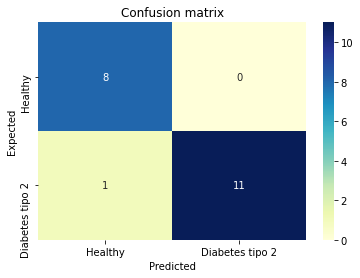

<Figure size 432x288 with 0 Axes>

In [55]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



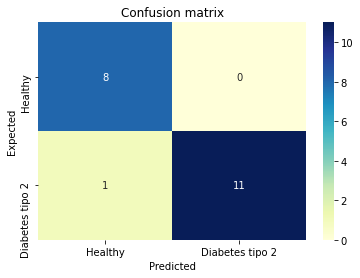

<Figure size 432x288 with 0 Axes>

In [56]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



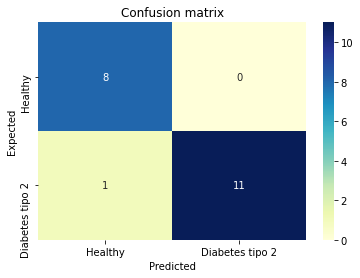

<Figure size 432x288 with 0 Axes>

In [57]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



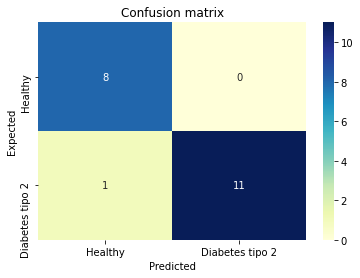

<Figure size 432x288 with 0 Axes>

In [58]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



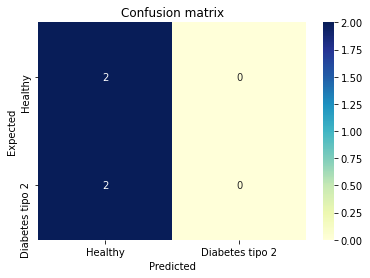

<Figure size 432x288 with 0 Axes>

In [59]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma despues del Filtro vancouver con PCA

shape of X_pca (20, 5)
[9.98333060e-01 8.42515556e-04 1.98686749e-04 1.01613399e-04
 6.40145382e-05]
suma: 0.9995398907094215
shape of X_pca (20, 5)
[9.98333060e-01 8.42515556e-04 1.98686749e-04 1.01613399e-04
 6.40145382e-05]
suma: 0.9995398907094215


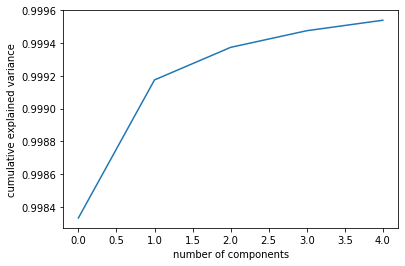

In [60]:
eardata = PCA_conversion(eardata,5,"vein")

## XGBClassifier

[21:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

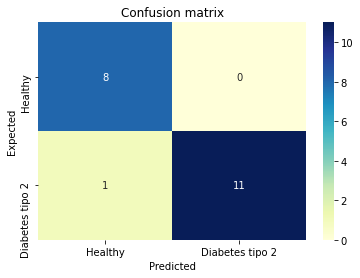

<Figure size 432x288 with 0 Axes>

In [61]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



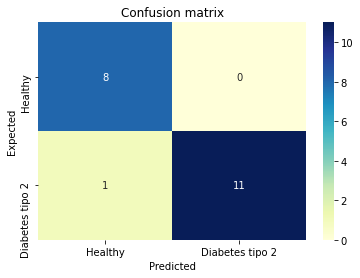

<Figure size 432x288 with 0 Axes>

In [62]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



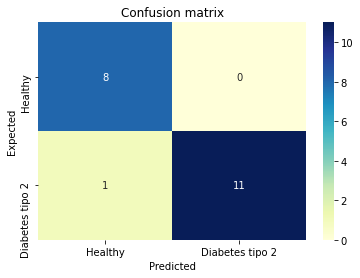

<Figure size 432x288 with 0 Axes>

In [63]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



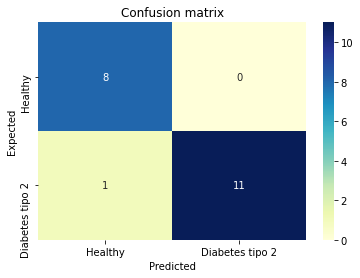

<Figure size 432x288 with 0 Axes>

In [64]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



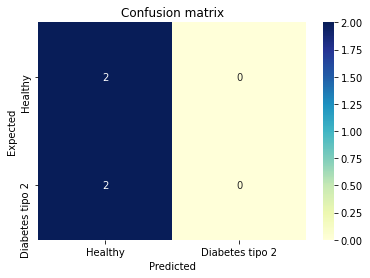

<Figure size 432x288 with 0 Axes>

In [65]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])


X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma sin Filtro vancouver

In [66]:
path_dataset = 'archive/vein.csv'
eardata = pd.read_csv(path_dataset)
eardata = ear.iloc[0:]
y = eardata['has_DM2']
eardata = eardata.drop('patientID', axis=1)
eardata = eardata.drop('has_DM2', axis=1)

## XGBClassifier

[21:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

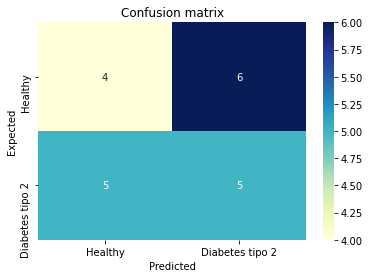

<Figure size 432x288 with 0 Axes>

In [67]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.44      0.44         9
         1.0       0.55      0.55      0.55        11

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



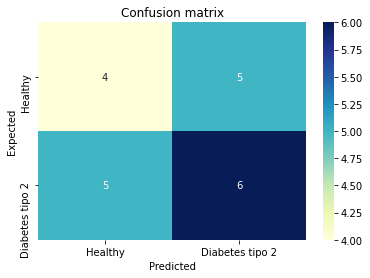

<Figure size 432x288 with 0 Axes>

In [68]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.38      0.35         8
         1.0       0.55      0.50      0.52        12

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.46      0.45      0.45        20



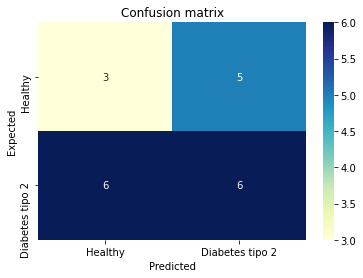

<Figure size 432x288 with 0 Axes>

In [69]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.55      0.71        20

    accuracy                           0.55        20
   macro avg       0.50      0.28      0.35        20
weighted avg       1.00      0.55      0.71        20



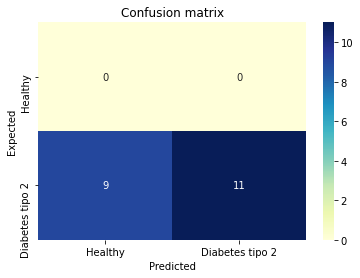

<Figure size 432x288 with 0 Axes>

In [70]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                50576     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 50,865
Trainable params: 50,865
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



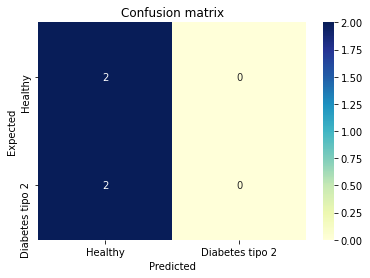

<Figure size 432x288 with 0 Axes>

In [71]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma sin Filtro vancouver con PCA

shape of X_pca (20, 5)
[0.87927166 0.09129159 0.00672034 0.00340985 0.00305335]
suma: 0.9837467968148697
shape of X_pca (20, 5)
[0.87927166 0.09129159 0.00672034 0.00340985 0.00305335]
suma: 0.9837467968148697


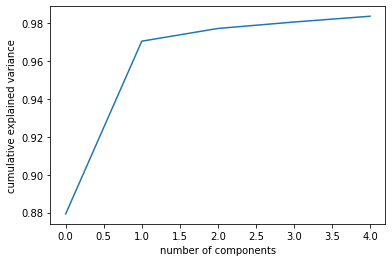

In [72]:
eardata = PCA_conversion(eardata,5,"vein")

## XGBClassifier

[21:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

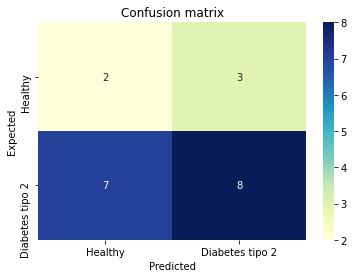

<Figure size 432x288 with 0 Axes>

In [73]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56         9
         1.0       0.64      0.64      0.64        11

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



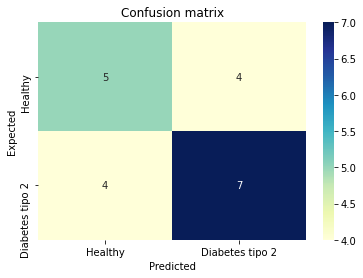

<Figure size 432x288 with 0 Axes>

In [74]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.57      0.50         7
         1.0       0.73      0.62      0.67        13

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.63      0.60      0.61        20



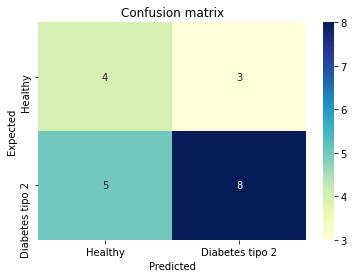

<Figure size 432x288 with 0 Axes>

In [75]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.55      0.71        20

    accuracy                           0.55        20
   macro avg       0.50      0.28      0.35        20
weighted avg       1.00      0.55      0.71        20



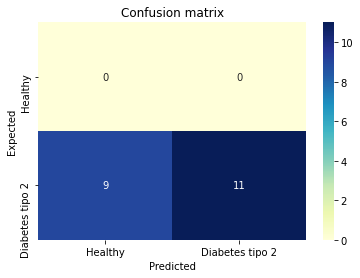

<Figure size 432x288 with 0 Axes>

In [76]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



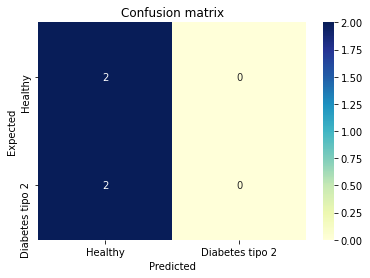

<Figure size 432x288 with 0 Axes>

In [77]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma recortado sin Filtro vancouver  

In [78]:
path_dataset = 'archive/vein.csv'
eardata = pd.read_csv(path_dataset)
eardata = ear.iloc[0:]
y = eardata['has_DM2']
eardata = eardata.drop('patientID', axis=1)
eardata = eardata.drop('has_DM2', axis=1)
eardata = eardata.iloc[: , 800:]
eardata = eardata.iloc[: , :1000]

## XGBClassifier

[21:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

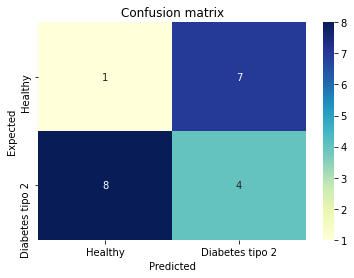

<Figure size 432x288 with 0 Axes>

In [79]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.22      0.22      0.22         9
         1.0       0.36      0.36      0.36        11

    accuracy                           0.30        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.30      0.30      0.30        20



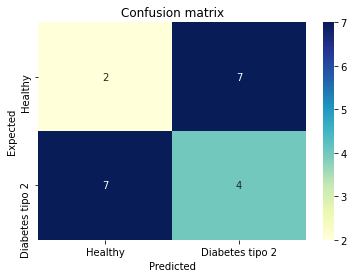

<Figure size 432x288 with 0 Axes>

In [80]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.22      0.33      0.27         6
         1.0       0.64      0.50      0.56        14

    accuracy                           0.45        20
   macro avg       0.43      0.42      0.41        20
weighted avg       0.51      0.45      0.47        20



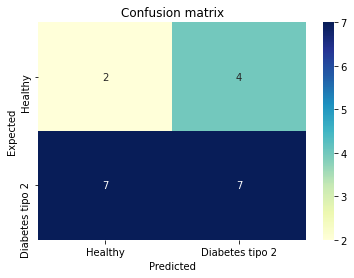

<Figure size 432x288 with 0 Axes>

In [81]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.82      0.50      0.62        18

    accuracy                           0.45        20
   macro avg       0.41      0.25      0.31        20
weighted avg       0.74      0.45      0.56        20



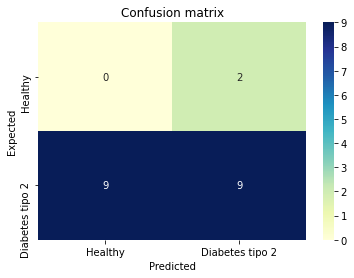

<Figure size 432x288 with 0 Axes>

In [82]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



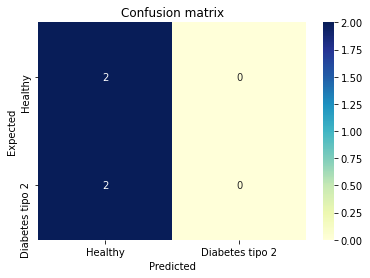

<Figure size 432x288 with 0 Axes>

In [83]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")

# Spectograma recortado sin Filtro vancouver   con PCA

shape of X_pca (20, 5)
[9.94431769e-01 2.75875666e-03 7.12334499e-04 3.33519845e-04
 2.10500356e-04]
suma: 0.9984468807642888
shape of X_pca (20, 5)
[9.94431769e-01 2.75875666e-03 7.12334499e-04 3.33519845e-04
 2.10500356e-04]
suma: 0.9984468807642888


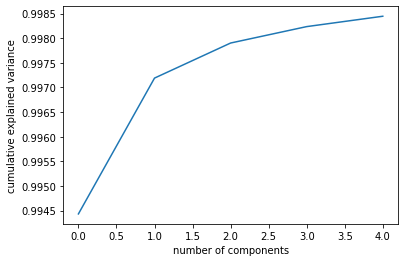

In [84]:
eardata = PCA_conversion(eardata,5,"vein")

## XGBClassifier

[21:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

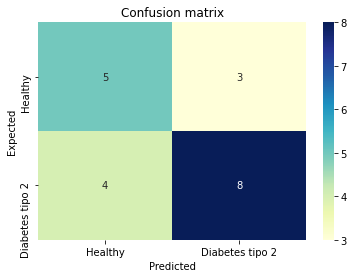

<Figure size 432x288 with 0 Axes>

In [85]:
entrenamiento_and_report_simple(eardata,y,5,XGBClassifier)

## Adabost

Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.62      0.59         8
         1.0       0.73      0.67      0.70        12

    accuracy                           0.65        20
   macro avg       0.64      0.65      0.64        20
weighted avg       0.66      0.65      0.65        20



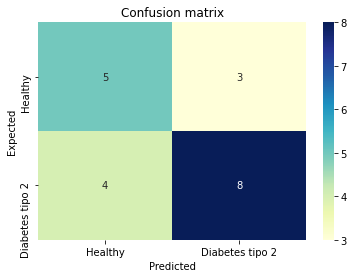

<Figure size 432x288 with 0 Axes>

In [86]:
entrenamiento_and_report_simple(eardata,y,5,ada_clf)

## Random Forest

Classification report:
              precision    recall  f1-score   support

         0.0       0.44      0.57      0.50         7
         1.0       0.73      0.62      0.67        13

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.63      0.60      0.61        20



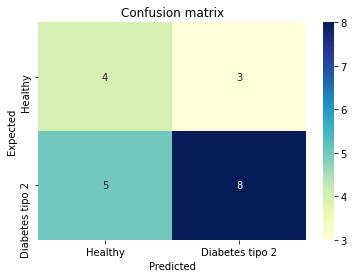

<Figure size 432x288 with 0 Axes>

In [87]:
entrenamiento_and_report_simple(eardata,y,5,RandomForestClassifier)

## SVM

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.55      0.71        20

    accuracy                           0.55        20
   macro avg       0.50      0.28      0.35        20
weighted avg       1.00      0.55      0.71        20



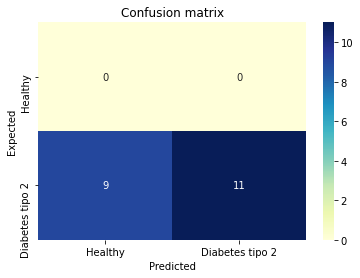

<Figure size 432x288 with 0 Axes>

In [88]:
entrenamiento_and_report_simple(eardata,y,5,svc)

## Red neuronal

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
[0, 0, 0, 0]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         4
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



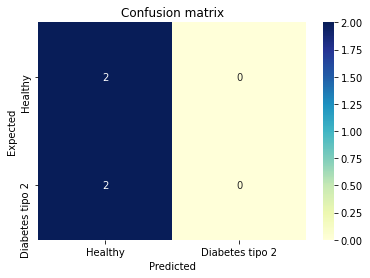

<Figure size 432x288 with 0 Axes>

In [89]:
import tensorflow as tf
from numpy import argmax
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers

max_features = eardata.shape[1]

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(max_features,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy'])

X_train, X_Test, y_train, y_test = train_test_split(eardata,y, test_size = 0.2,random_state=42)
model.fit(X_train,
          y_train,batch_size=512,
          epochs=200,
          verbose=0,
          validation_split=0.2)


predict_list=model.predict(X_Test)
objetivo = argmax(predict_list, axis=-1).astype('int')
y_classes = [np.argmax(y, axis=None, out=None) for y in predict_list]
print(y_classes)



matriz_confusion = confusion_matrix(y_test, objetivo)
heatmap(matriz_confusion, annot=True, fmt="g",cmap="YlGnBu", yticklabels=["Healthy", "Diabetes tipo 2"] ,xticklabels=["Healthy", "Diabetes tipo 2"])
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.figure()
print(f"Classification report:\n{classification_report(objetivo, y_test)}")